In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
purchase = pd.read_csv('purchase data.csv')

In [3]:
purchase

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [4]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

Import Segmentation Model


In [6]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [7]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [8]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

Standardization

In [9]:
features = purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
purchase_segm_std = scaler.transform(features)

# PCA

In [10]:
purchase_segm_std_pca = pca.transform(purchase_segm_std)

# K-means PCA

In [11]:
purchase_segm_std_kmeans_pca = kmeans_pca.predict(purchase_segm_std_pca)

In [12]:
purchase_predictors = purchase.copy()

In [13]:
purchase_predictors['segment'] = purchase_segm_std_kmeans_pca

# Data Analytics by Customer

In [14]:
purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [15]:
temp01 = purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp01 = temp01.set_index('ID')
temp01 = temp01.rename(columns = {'Incidence': 'N_Visits'})
temp01.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [16]:
Lad1 = purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).count()
Lad1 = Lad1.set_index('ID')
Lad1 = Lad1.rename(columns =  {'Incidence':'N_Visits'})
Lad1.head()



,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [17]:
Lad2 = purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
Lad2 = Lad2.set_index('ID')
Lad2 = Lad2.rename(columns = {'Incidence':'N_purchases'})
Lad3 = Lad1.join(Lad2)
Lad3.head()


,N_Visits,N_purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [18]:
#Average number of purchases by customer ID
Lad3['Average N_purchase'] = Lad3['N_purchases']/Lad3['N_Visits']
Lad3.head()

,N_Visits,N_purchases,Average N_purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [19]:
#We obtain the segment of each customer in the data set
Lad4 = purchase_predictors[['ID','segment']].groupby(['ID'], as_index = False).mean()
Lad4 = Lad4.set_index('ID')
purchase_lad = Lad3.join(Lad4)
purchase_lad.head()

,N_Visits,N_purchases,Average N_purchase,segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


# Segment Proportion

In [20]:
#we calculate the proportion of each segment and set appropriate column names
segm_prop = purchase_lad[['N_purchases', 'segment']].groupby(['segment']).count() / purchase_lad.shape[0]
segm_prop = segm_prop.rename(columns = {'N_purchases':'Segment Proportions'})
segm_prop.head()

,Segment Proportions
segment,
0,0.206
1,0.220
2,0.378
3,0.196


Text(0.5, 1.0, 'Segment Proportions')

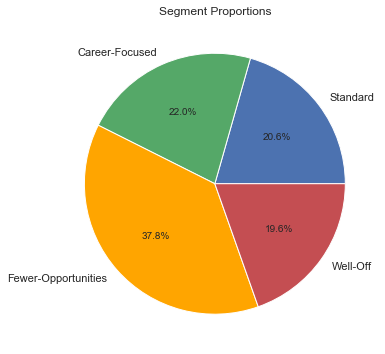

In [21]:
# We plot the segment proportions as a pie chart. 
# We can easily see which is the largest segment and the relative sizes of each segment.
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'orange', 'r'))
plt.title('Segment Proportions')

# Purchase Ocassion and Purchase Incidence

In [22]:
segm_mean = purchase_lad.groupby(['segment']).mean()
segm_mean

,N_Visits,N_purchases,Average N_purchase
segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [23]:
segm_std = purchase_lad.groupby(['segment']).std()
segm_std

,N_Visits,N_purchases,Average N_purchase
segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

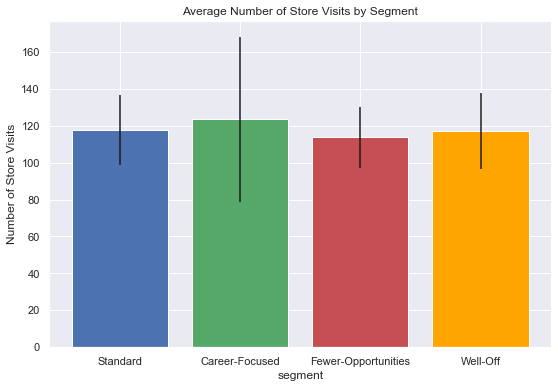

In [24]:
# We plot the average number of store visits for each of the four segments using a bar chart.
# We display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segm_mean['N_Visits'],
        yerr = segm_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchases by Segment')

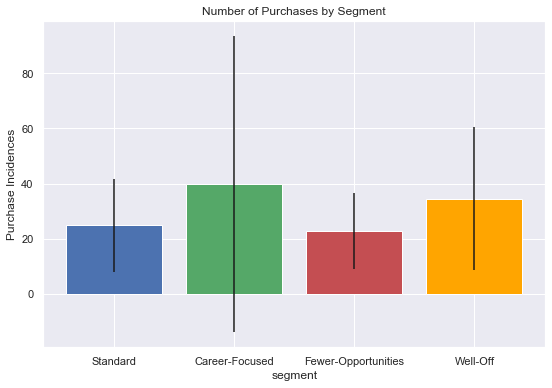

In [25]:
# We display the average number of purchases by segments. 
# They will help us understand how often each group buys chocholate candy bars.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segm_mean['N_purchases'],
        yerr = segm_std['N_purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

# Brand Choice

In [27]:
purchase_incidence = purchase_predictors[purchase_predictors['Incidence']==1]

In [28]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['segment'], brand_dummies['ID'] = purchase_incidence['segment'], purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [29]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [32]:
mean_brand_choice = temp.groupby(['segment'], as_index = True).mean()

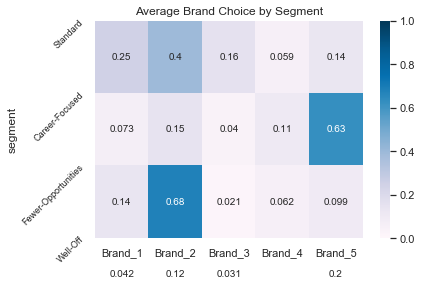

In [33]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

# Revenue

In [35]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased, 
# we multiply the price of the brand for that particular day by the quantity of the product purchased.
temp = purchase_predictors[purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['segment', 'Revenue Brand 1']] = temp[['segment', 'Revenue Brand 1']].groupby(['segment'], as_index = False).sum()
segments_brand_revenue

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [37]:
# Compute revenue for brand 2. We use the same formula, but here we filter our data to contain only purchases of brand 2.
temp = purchase_predictors[purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['segment', 'Revenue Brand 2']] = temp[['segment', 'Revenue Brand 2']].groupby(['segment'], as_index = False).sum()

In [38]:
# Compute revenue for brand 3. We use the same formula, but here we filter our data to contain only purchases of brand 3.
temp = purchase_predictors[purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['segment', 'Revenue Brand 3']] = temp[['segment', 'Revenue Brand 3']].groupby(['segment'], as_index = False).sum()

In [39]:
# Compute revenue for brand 4. We use the same formula, but here we filter our data to contain only purchases of brand 4.
temp = purchase_predictors[purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['segment', 'Revenue Brand 4']] = temp[['segment', 'Revenue Brand 4']].groupby(['segment'], as_index = False).sum()

In [40]:
# Compute revenue for brand 5. We use the same formula, but here we filter our data to contain only purchases of brand 5.
temp = purchase_predictors[purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['segment', 'Revenue Brand 5']] = temp[['segment', 'Revenue Brand 5']].groupby(['segment'], as_index = False).sum()

In [41]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [44]:
# We further modify our table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# We also add the labels for the segments.s
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['segment'] = segments_brand_revenue['segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
